$LINEAR$ $REGRESSION$

In [297]:
#import packages
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
%matplotlib inline


In [298]:
# Importing the dataset and Extracting the Independent and Dependent variables
wine = pd.read_csv('winequality-red.csv')
X = wine.iloc[:, :-1].values
y = wine.iloc[:, 11].values

In [299]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot: >

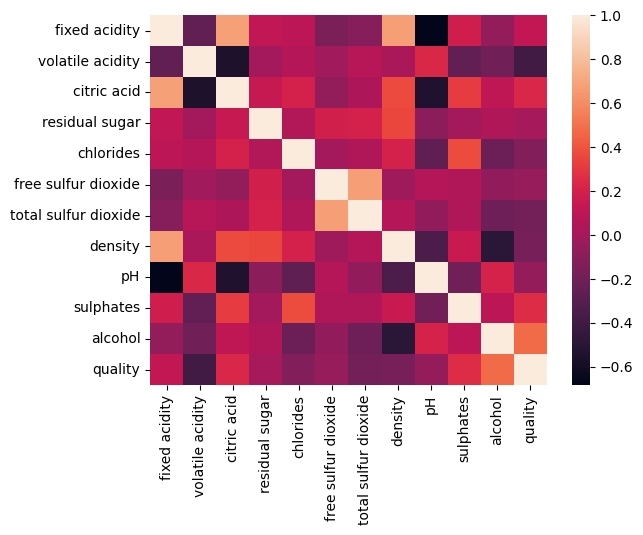

In [300]:
# Building the Correlation matrix

sns.heatmap(wine.corr())

Correlation matrix heat map shows that alcohol, sulphates, and citric acid affect the wine quality most. Volatile acidity has nearly no effect.Based on this, I will get rid of the volatile acidity column. 

In [301]:
#wine.drop("volatile acidity", axis='columns')

In [302]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [303]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [304]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([5.77698343, 5.04186238, 6.58812977, 5.38449676, 5.94235649,
       5.05262894, 5.41458193, 6.01438796, 4.84612312, 4.96358462,
       5.34037719, 5.45310236, 5.74762487, 5.04609467, 5.5298785 ,
       6.37077951, 6.81048257, 5.80786582, 5.94225643, 5.10463618,
       6.30480803, 5.20797767, 5.63891192, 6.14447946, 5.5130062 ,
       5.01701749, 5.19879799, 6.49572365, 5.34885245, 6.2195562 ,
       6.09065844, 5.8570942 , 5.54513074, 5.28600391, 5.70464326,
       6.2153627 , 5.16300514, 5.46547134, 6.36024605, 5.78842262,
       5.45247612, 6.05034673, 6.65558681, 6.58819242, 6.01087011,
       4.79026321, 5.52926762, 6.01442528, 5.50581887, 6.1094846 ,
       5.3645023 , 5.3569158 , 5.78100776, 6.36560789, 5.74243611,
       5.23301561, 5.08378558, 5.33390739, 6.50763077, 5.46055241,
       5.15491058, 5.77792925, 6.05806639, 6.29836916, 5.07172948,
       6.1147426 , 5.36980622, 6.02148855, 6.14452363, 6.04562478,
       5.31885448, 5.49214109, 5.06785305, 5.58701634, 5.63591

In [305]:
#round off the values of ypred to whole numbers because that is how the wine qualities appear in the data set
y_pred=np.around(y_pred)
y_pred

array([6., 5., 7., 5., 6., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 6., 7.,
       6., 6., 5., 6., 5., 6., 6., 6., 5., 5., 6., 5., 6., 6., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 5., 6., 7., 7., 6., 5., 6., 6., 6., 6., 5.,
       5., 6., 6., 6., 5., 5., 5., 7., 5., 5., 6., 6., 6., 5., 6., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       5., 6., 5., 5., 5., 5., 5., 6., 5., 6., 5., 6., 5., 5., 6., 7., 6.,
       6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 6., 6., 6., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 5., 6., 6., 6., 5.,
       6., 5., 6., 5., 6., 5., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6., 5.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 5., 6.,
       6., 6., 5., 7., 6., 6., 6., 7., 6., 5., 5., 7., 5., 6., 7., 5., 6.,
       6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       5., 5., 5., 6., 6., 5., 6., 6., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       6., 6., 6., 5., 6.

In [306]:
# Calculating the Coefficients
print(regressor.coef_)

[ 2.02362546e-02 -1.21385635e+00 -9.84560496e-02  2.21024824e-02
 -1.89761853e+00  1.99433159e-03 -3.00386885e-03 -1.67249074e+01
 -3.97705407e-01  8.54179474e-01  2.67506351e-01]


In [307]:
# Calculating the Intercept
print(regressor.intercept_)

21.011050090684


This value tells us what the quality would be if all the variables were set to zero. It is evident that it doesn't tell us anything significant about the quality except that any sensible value for quality depends on the variables.

In [308]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2231638418079096

Our model did a really bad job of predicting the wine quality. Only 20% of the samples were predicted correctly. This tell us that the variables, for the most part do not have a linear relationship with the quality.

$LOGISTIC$ $REGRESSION$

In [309]:
from sklearn.linear_model import LogisticRegression
#We need to modify the Linear Regression model to support multiclass classification
lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [310]:
lg_model.fit(X_train, y_train)

C:\Users\kwyll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [311]:
y_predicted = lg_model.predict(X_test)

In [312]:
y_predicted

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [313]:
lg_model.score(X_test,y_test)

0.6229166666666667

The logistic regression classifier did much better than the linear regression model with 63% correctness

$KNN$

In [314]:
#Scale the data
sc_X = StandardScaler()
X_traink = sc_X.fit_transform(X_train)
X_testk = sc_X.transform(X_test)

In [315]:
#calculate k
k=round(math.sqrt(len(y_train)))
k

33

In [316]:
classifier = KNeighborsClassifier(n_neighbors=36, p=2,metric='euclidean')

In [317]:
classifier.fit(X_traink, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [318]:
knn_pred = classifier.predict(X_testk)
knn_pred

array([6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6,
       7, 7, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 7, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5, 7, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6,

In [319]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, knn_pred))

[[  0   0   3   0   0   0]
 [  0   0   9   6   0   0]
 [  0   0 143  65   0   0]
 [  0   0  49 144  11   0]
 [  0   0   1  32  12   0]
 [  0   0   0   3   2   0]]


In [320]:
print(accuracy_score(y_test, knn_pred))


0.5666666666666667


KNN was 60% accurate. Almost as good as the logistic regression classifier

$NAIVE$ $BAYSE$ $CLASSIFIER$

In [321]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()

In [322]:
nbmodel.fit(X_train,y_train)

GaussianNB()

In [323]:
nb_y_pred=nbmodel.predict(X_test)

In [324]:
nb_y_pred

array([6, 5, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 7, 5, 6, 8, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 6, 7, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 7, 6, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5, 6, 7, 7, 6, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 4, 5, 7, 7, 5, 5, 7, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 7, 7, 6, 6, 6, 7, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 8, 5, 6, 7, 6, 5, 7, 6, 7,
       6, 8, 6, 5, 5, 8, 5, 7, 8, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 7, 5, 6, 7, 4, 7, 5, 5, 6, 7, 6, 5,
       5, 6, 8, 6, 5, 7, 7, 6, 5, 5, 5, 6, 3, 6, 7, 6, 7, 7, 8, 7, 5, 4,
       5, 5, 6, 5, 6, 5, 4, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 8, 5, 6,
       5, 5, 5, 5, 5, 7, 6, 6, 6, 6, 7, 6, 7, 5, 7, 7, 5, 7, 6, 7, 6, 5,
       6, 5, 7, 6, 6, 4, 6, 5, 5, 6, 5, 6, 5, 5, 6,

In [325]:
accuracy_score(y_test, nb_y_pred)

0.5479166666666667

Gaussian Naive Bayes had 53% accuracy. Worse than KNN, and Logistic regression, but better than linear regression

$DECSION$ $TREE$ $CLASSIFIER$

In [326]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
 max_depth=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)

In [327]:
y_pred_tree = clf_entropy.predict(X_test)
y_pred_tree

array([6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5,
       5, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 5, 5, 6, 7, 7, 6, 6, 5, 5, 5, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5,
       6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 8, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 7, 5, 7, 6, 5, 6, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [328]:
score = accuracy_score(y_test, y_pred_tree)
score

0.5770833333333333

$Random$ $Forest$ $Classifier$

$Perfomance$ $comparison$

In [329]:
#alternative decision tree models
clf_gini=DecisionTreeClassifier(criterion ="gini", random_state = 5)

clf_log_loss = DecisionTreeClassifier(criterion = "log_loss", random_state = 5)

#alternative naive bayes models
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB

mn_nb=MultinomialNB()
comp_nb=ComplementNB()
b_nb=BernoulliNB()
cat_nb=CategoricalNB()




In [330]:
models=[regressor, lg_model, classifier,clf_gini, nbmodel, b_nb,clf_entropy,clf_log_loss]


In [331]:
def cv_perfomace_report(models, X, y, n):
    scores=[]
    report=[]
    for i in models:
        if (i==classifier):
            scores.append(np.average(cross_val_score(i,sc_X.fit_transform(X), y, cv=n)))
        else:
            scores.append(np.average(cross_val_score(i,X, y, cv=n)))
    scores=np.array(scores)
    p=[]
    for i in models:
        if (str(i).find("DecisionTreeClassifier")!=1 and str(i).find("criterion") !=-1):
            p.append(str(i).split('(')[0]+str(i).split("=")[1].split(',')[0])
        else:
            p.append(str(i).split("(")[0])
    models=np.array(p)
    plt.bar(models, scores)
    plt.xticks(rotation=80)
    plt.show()

    #create a table 
    for i in range(len(models)):
        report.append([models[i],scores[i]])
    columnNames=["Model","Average Accuracy"]
    table=tabulate(report, headers=columnNames)
    print(table)

C:\Users\kwyll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\kwyll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kwyll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache

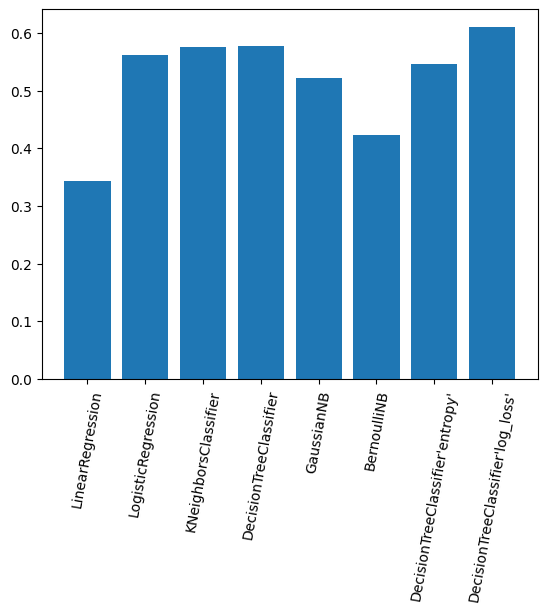

Model                               Average Accuracy
--------------------------------  ------------------
LinearRegression                            0.343754
LogisticRegression                          0.561213
KNeighborsClassifier                        0.5764
DecisionTreeClassifier                      0.577309
GaussianNB                                  0.521879
BernoulliNB                                 0.422699
DecisionTreeClassifier'entropy'             0.546042
DecisionTreeClassifier'log_loss'            0.610352


In [332]:
cv_perfomace_report(models, X_train, y_train, 10)

The classification models had the best performance with the log_loss DecisionTree classifier having the highest accuracy of 58.8%. The overall performance of all models was not vey good with Linear regression performing extremly poorly with an accuracy of 33.7%. All the models perfomed better than what is possible by chance which, with 6 categories,=16.6%.